# Weather prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.shape  # it shows thw rows and columns in the dataset

(1461, 6)

In [5]:
df.notnull().sum()   # it shows the sum of all the not null values 

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [6]:
df.info()  
#it defines all properties of the dataframe like 
#rows, columns,null values, not null values, data-type,memory usage etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.describe(include="all")  # describe function defines the maximum ,minimum values of the particular column

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


In [8]:
df.dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [9]:
df.duplicated().sum()

0

In [10]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [11]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [12]:
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [13]:
df["date"]=pd.to_datetime(df["date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


# Visualisation

In [15]:
df.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


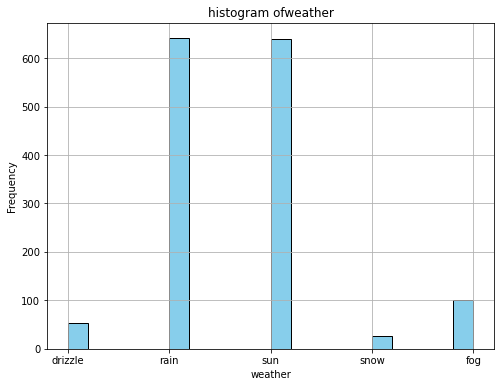

In [16]:
col="weather"
plt.figure(figsize=(8,6))
plt.hist(df[col],bins=20,color="skyblue",edgecolor="black")
plt.xlabel("weather")
plt.ylabel("Frequency")
plt.title("histogram of"+col)
plt.grid(True)
plt.show()

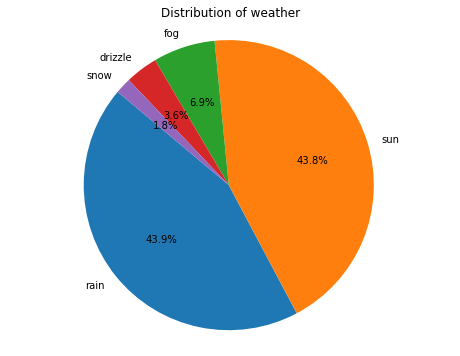

In [17]:
counts=df[col].value_counts()
plt.figure(figsize=(8,6))
plt.pie(counts,labels=counts.index,autopct="%1.1f%%",startangle=140)
plt.title("Distribution of "+col)
plt.axis("equal")
plt.show()

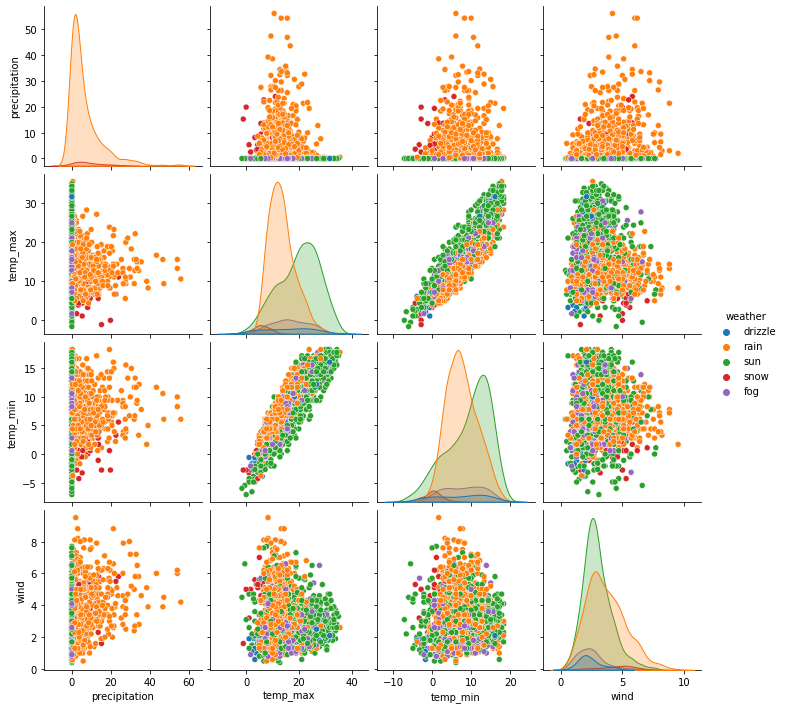

In [18]:
sns.pairplot(df,hue="weather")

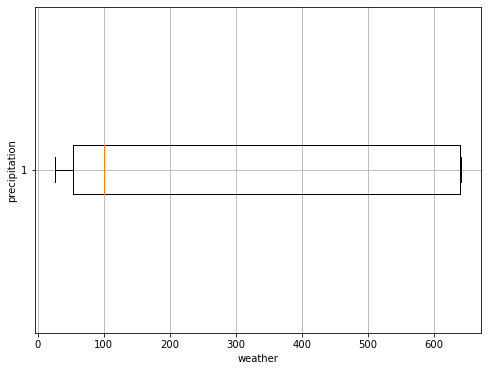

In [19]:
plt.figure(figsize=(8,6))
plt.boxplot(df.groupby(col).size(),vert=False)# to create horizontal box plot
plt.xlabel("weather")
plt.ylabel("precipitation")
plt.grid(True)#add gridlines to plot
plt.show()

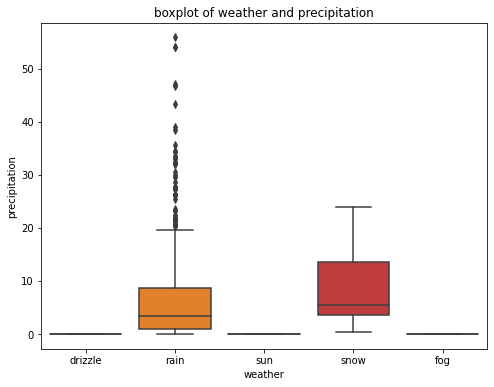

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='weather', y='precipitation')
plt.xlabel('weather')
plt.ylabel('precipitation')
plt.title('boxplot of weather and precipitation')
plt.show()

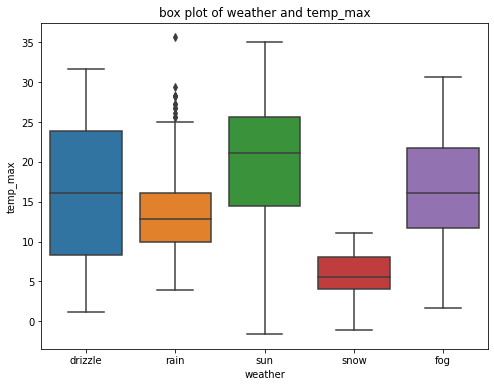

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='weather', y='temp_max')
plt.xlabel('weather')
plt.ylabel('temp_max')
plt.title('box plot of weather and temp_max')
plt.show()

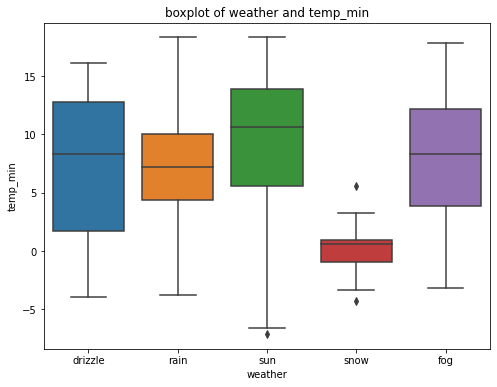

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='weather', y='temp_min')
plt.xlabel('weather')
plt.ylabel('temp_min')
plt.title('boxplot of weather and temp_min')
plt.show()

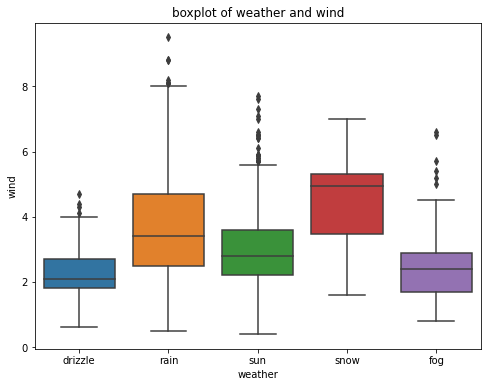

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='weather', y='wind')
plt.xlabel('weather')
plt.ylabel('wind')
plt.title('boxplot of weather and wind')
plt.show()

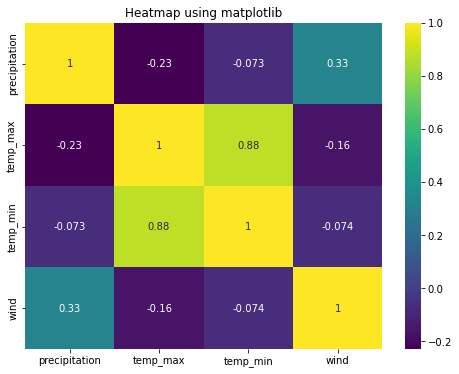

In [24]:
columns=["precipitation","temp_max","temp_min","wind"]
dt=df[columns]
plt.figure(figsize=(8,6))
sns.heatmap(dt.corr(),cmap="viridis",annot=True)
plt.title("Heatmap using matplotlib")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["weather"]=le.fit_transform(df['weather'])

In [26]:
df.drop(columns={"date"},inplace=True)
x=df.drop(columns={"weather"}).values
y=df["weather"].values


In [27]:
y

array([0, 2, 2, ..., 1, 4, 4])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=45)

In [29]:
X_train

array([[ 1. , 18.3,  8.9,  4. ],
       [14. , 11.7,  7.2,  5.1],
       [16. , 14.4,  8.9,  4.2],
       ...,
       [ 0. , 26.1, 16.1,  2.9],
       [ 0. ,  7.8,  3.9,  1.9],
       [ 0. , 22.8, 15. ,  3.4]])

In [30]:
X_test

array([[ 2. , 13.9,  8.9,  4.6],
       [ 3.3, 11.7,  2.8,  3.3],
       [ 1.5,  6.7,  2.8,  2.1],
       ...,
       [23.1, 14.4,  9.4,  5.1],
       [ 3.8, 13.9,  6.7,  5.2],
       [ 1. ,  6.1,  0.6,  3.4]])

In [31]:
y_train

array([2, 2, 2, ..., 4, 2, 4])

In [32]:
y_test

array([2, 2, 2, 2, 4, 2, 0, 0, 2, 4, 4, 4, 3, 4, 4, 2, 2, 4, 4, 2, 2, 1,
       1, 2, 4, 4, 2, 2, 1, 3, 4, 2, 4, 1, 2, 1, 1, 4, 2, 1, 2, 3, 4, 1,
       2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 3, 4, 2, 1, 4, 4, 4, 1, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 3, 2, 2,
       4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 1, 2, 2, 1, 2, 4, 4, 2, 2,
       2, 1, 2, 2, 1, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 4, 1, 2, 2, 1, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 1, 4, 1, 4, 4, 4, 2, 4, 2,
       2, 4, 0, 2, 2, 2, 4, 2, 4, 4, 4, 0, 2, 1, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 1, 0, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 1, 2, 2, 2, 1, 4, 2, 4, 3, 1, 2, 4, 4, 0, 2, 4, 4,
       4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 4, 4, 2, 2, 2, 4,
       1, 4, 1, 2, 4, 2, 2, 2, 2, 4, 4, 2, 0, 4, 4,

# modeling

In [33]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)


DecisionTreeRegressor(random_state=1)

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([2., 2., 2., 2., 2., 2., 4., 4., 2., 4., 4., 4., 3., 4., 4., 2., 2.,
       4., 4., 2., 2., 4., 4., 2., 4., 1., 2., 2., 4., 3., 4., 2., 4., 4.,
       2., 1., 1., 1., 2., 4., 2., 3., 4., 1., 2., 4., 4., 2., 4., 1., 2.,
       4., 1., 2., 4., 1., 2., 2., 2., 2., 4., 4., 2., 2., 4., 2., 2., 4.,
       1., 4., 4., 4., 0., 2., 0., 2., 4., 4., 4., 3., 4., 2., 4., 4., 4.,
       4., 0., 4., 4., 2., 2., 4., 2., 4., 4., 4., 2., 2., 2., 4., 4., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 3., 4., 2., 2., 4., 2.,
       4., 4., 2., 4., 4., 2., 2., 2., 2., 4., 4., 2., 2., 2., 0., 2., 2.,
       4., 2., 4., 4., 1., 2., 2., 2., 2., 2., 2., 4., 2., 2., 4., 2., 4.,
       2., 2., 4., 2., 4., 4., 4., 2., 4., 4., 2., 2., 4., 0., 2., 2., 0.,
       4., 4., 4., 1., 2., 2., 2., 4., 1., 2., 4., 2., 4., 0., 4., 2., 2.,
       2., 4., 4., 0., 0., 4., 4., 4., 2., 4., 2., 2., 4., 4., 2., 2., 4.,
       0., 2., 4., 4., 4., 4., 2., 4., 4., 1., 2., 2., 2., 2., 2., 2., 1.,
       1., 4., 2., 4., 4.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  1   0   0   0  11]
 [  4   6   2   0  21]
 [  0   0 149   2   8]
 [  0   0   1   6   0]
 [ 14  16   4   0 121]]
0.773224043715847


In [37]:
import joblib

In [38]:
joblib.dump(model,open('predict.pkl','wb'))

In [39]:
df.head(15)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2
7,0.0,10.0,2.8,2.0,4
8,4.3,9.4,5.0,3.4,2
9,1.0,6.1,0.6,3.4,2
